$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Comparing two groups with permutation testing

In a moment we are going to compare some measures we collected from two
different groups.

The data we are going to compare is from an experiment in which domestic
chicks were fed a feed supplement (`with_supplement`), or were fed a normal
diet without supplements (`no_supplement`). They were weighed after 2 weeks
on these diets to test whether the supplement increases chick weight.

Here are the chick weights for the two groups:

In [1]:
no_supplement = [179, 160, 136, 227, 217, 168, 108, 124, 143, 140]
with_supplement = [309, 229, 181, 141, 260, 203, 148, 169, 213, 257, 244, 271]

`no_supplement` and `with_supplement` are lists.

We can get the number of items in the list using `len`. For example, there
are 10 chicks in the `no_supplement` group:

In [2]:
len(no_supplement)

10

We can get the sum of the values in the list with `sum`:

In [3]:
sum(no_supplement)

1602

In [4]:
# Checking that the sum is the addition of all the elements.
179 + 160 + 136 + 227 + 217 + 168 + 108 + 124 + 143 + 140

1602

The *mean* of the values in the list is defined as the sum divided by
the number of items. For example, here is the mean of the weights in the
`no_supplement` group:

In [5]:
sum(no_supplement) / len(no_supplement)

160.2

We can define a “function” that calculates the mean, like this:

In [6]:
def mean(some_list):
    """ Calculates the mean of the values in `some_list`
    """
    return sum(some_list) / len(some_list)

Now we can get the mean with:

In [7]:
mean(no_supplement)

160.2

The mean is greater for the `with_supplement` group:

In [8]:
mean(with_supplement)

218.75

The difference between the means is:

In [9]:
observed_difference = mean(with_supplement) - mean(no_supplement)
observed_difference

58.55000000000001

We see that the means of the two groups are different - but can we be
confident that this difference did not come about by chance?

As you can see from the `no_supplement` values, all the chicks have
different weights.  These differences are due to factors we cannot control,
such as genetic variation.  But, these differences create a problem in
comparing the means between `no_supplement` and `with_supplement`.  For
example, we could take another 10 chicks that didn’t take the supplement, and
make a new group called `no_supplement_2`.  Because of the ordinary
variation in chick weights, the `no_supplement_2` group would have a
different set of weights to `no_supplement`, and therefore, a different
mean.  Therefore, if we subtract the mean for `no_supplement` from the mean
for `no_supplement_2`, the value will not be zero.  Sometimes the difference
in means will be above zero, and sometimes below.

So, even if we take two samples in the `no_supplement` condition, they will
differ.  We want to be sure we aren’t fooling ourselves about the
`observed_difference` - maybe that kind of difference could have come about
when comparing two samples in the `no_supplement` condition, just due to
ordinary variation in chick weights.  Maybe there is no real effect of the
supplement, and the `with_supplement` values are not distinguishable from
another sample of 13 chicks in the `no_supplement` condition.

Statistical hypothesis testing is like resolving an argument between a sceptic
and an optimist.   The sceptic says “you are fooling yourself” and argues that
`observed_difference` came about by chance, because of ordinary variation in
the chick weight, and not because of the effect of the supplement.  This is
called the *null* hypothesis - the hypothesis that nothing but chance is
necessary to explain the results.  The optimist advances the *alternative*
hypothesis - in this case that the `observed_difference` should be explained
by a real effect of the supplement, and cannot be explained by chance
variation alone.  We will proceed by looking to see how likely
`observed_difference` is, under the null hypothesis - that is, under the
hypothesis that the difference can be explained by ordinary variation alone.

One way we could check whether `observed_difference` could have come about
by ordinary variation, is by measuring the weights of thousands of chicks in
the `no_supplement` condition.  We could split these new samples into groups
of 23, and then further split the group of 23 into a `group_A` group
of size 10 and another `group_B` group of size 13.  Then we
calculate the difference in the means between `group_A` and
`group_B`, store it, and move on to the next 23 chick weights, to
repeat the procedure.  We would end up with a distribution of the mean weight
differences that arise just due to ordinary variation.  If
`observed_difference` is very large compared to the range of differences in
this no-supplement experiment, we might be prepared to reject the null
hypothesis.

Sadly, we do not have thousands of chick weights that we need to do that
check.  But, it turns out we can get something very similar by *permuting* the
data we have.

Let’s start with the null hypothesis - that there is no difference in chick
weight caused by the supplement.  If that hypothesis is true, then all the
weights in `no_supplement` and in `with_supplement` can be considered as
being samples from the `no_supplement` condition.

To express this, I’m going to pool all the weights into one big group, like
this:

In [10]:
# The + below appends the second list to the first
all_chicks = no_supplement + with_supplement
all_chicks

[179,
 160,
 136,
 227,
 217,
 168,
 108,
 124,
 143,
 140,
 309,
 229,
 181,
 141,
 260,
 203,
 148,
 169,
 213,
 257,
 244,
 271]

In this new pooled list, the first 10 weights are from the
`no_supplement` group, and the rest are from the `with_supplement`
group.

Here I am getting the first 10 values from the combined list - the
`no_supplement` values:

In [11]:
# All values up to (including) the tenth
# (the no_supplement list)
all_chicks[:10]

[179, 160, 136, 227, 217, 168, 108, 124, 143, 140]

We can also get the `with_supplement` values from the combined list:

In [12]:
# All values from (but not including) the tenth
# (the with_supplement list)
all_chicks[10:]

[309, 229, 181, 141, 260, 203, 148, 169, 213, 257, 244, 271]

Now we have the new pooled list, we can do something similar to taking the new
`group_A` and `group_B` groups we imagined above.  That
is, we can *shuffle* the combined group to a random order, and split this
shuffled combined group into a group of 10 and a group of 13.  We get the
difference in means of these two groups, and store it.  We keep shuffling, to
create more `group_A` and `group_B` groups, and more
differences in means. The generated distribution of the mean differences is
the distribution we expect on the null hypothesis, that there is no real
difference between the two groups.  We can see where `observed_difference`
lies in this generated distribution, and this gives us a measure of whether
the `observed_difference` is likely on the null hypothesis.

Python’s `random.shuffle` function can do the shuffle for us:

In [13]:
import random

`random.shuffle` takes a list and shuffles it to a random order. Here I make
a small example list and shuffle it a few times to show you that the order of
the list changes:

In [14]:
# A small example list
a_list = [1, 2, 3, 4, 5]
# Shuffle it
random.shuffle(a_list)
# The shuffled list has a different (random) order
a_list

[1, 5, 4, 2, 3]

In [15]:
# Shuffling again gives a different order
random.shuffle(a_list)
a_list

[3, 1, 5, 2, 4]

In [16]:
random.shuffle(a_list)
a_list

[1, 3, 2, 4, 5]

Here’s a random shuffle of the combined `no_supplement` and
`with_supplement` list:

In [17]:
random.shuffle(all_chicks)
all_chicks

[108,
 217,
 168,
 213,
 140,
 244,
 143,
 260,
 229,
 136,
 309,
 124,
 148,
 181,
 141,
 257,
 160,
 169,
 227,
 203,
 179,
 271]

Now for our permutation test.  We’ve assumed the null hypothesis.  We have
randomly shuffled the combined group.  We’ll call the first 10 values
`group_A` and the last 13 values `group_B`.

After the shuffling, the `group_A` group is a random mix of the
`no_supplement` and `with_supplement` values, as is the
`group_B` group.

Here is a function that takes the combined list and returns the difference in
means:

In [18]:
def difference_in_means(combined_list):
    """ Split suffled combind group into two, return mean difference
    """
    group_A = combined_list[:10]
    group_B = combined_list[10:]
    return mean(group_B) - mean(group_A)

Let’s get the difference in means for these new groups, generated by the
shuffle:

In [19]:
difference_in_means(all_chicks)

11.616666666666646

That difference from the shuffled groups looks a lot less than the difference
we originally found:

In [20]:
observed_difference

58.55000000000001

One difference is not enough.  We need more shuffled mean differences to see
whether `observed_difference` is really unusual compared to the range of
permuted group differences.  Here we run the shuffle procedure 5000 times, to
get a large range of values:

In [21]:
n_repeats = 5000
counter = n_repeats
shuffled_differences = []  # An empty list to store the differences
while counter > 0:
    random.shuffle(all_chicks)
    new_difference = difference_in_means(all_chicks)
    # Collect the new mean by adding to the end of the list
    shuffled_differences.append(new_difference)
    # Count down
    counter = counter - 1

This gives us 5000 differences from groups that are compatible with our null
hypothesis.   We can now ask whether `observed_difference` is unusually
large compared to the distribution of these 5000 differences.

In [22]:
%matplotlib inline

In [23]:
# The plotting package
import matplotlib.pyplot as plt

(array([  11.,   58.,  260.,  591., 1037., 1198., 1010.,  601.,  200.,
          34.]), array([-81.33333333, -66.39166667, -51.45      , -36.50833333,
        -21.56666667,  -6.625     ,   8.31666667,  23.25833333,
         38.2       ,  53.14166667,  68.08333333]), <a list of 10 Patch objects>)

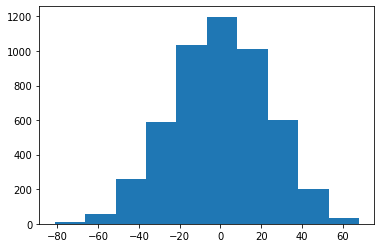

In [24]:
plt.hist(shuffled_differences)

Remember our `observed_difference`?

In [25]:
observed_difference

58.55000000000001

`observed_difference` looks like it is at the extreme right of the
distribution. But - how far to the right? What proportion of the 5000 null
hypothesis differences are greater than or equal to the observed value?

To test this, we first sort the null hypothesis differences from lowest to
highest:

In [26]:
sorted_differences = sorted(shuffled_differences)

Next we find how many of these null hypothesis differences are greater than or
equal to the `observed_difference`:

In [27]:
# Go through all the differences one by one.
# When we've found a difference greater than or equal to the observed
# one, stop.
index = 0
while index < n_repeats:
    # Check the sorted difference at the current index
    if sorted_differences[index] >= observed_difference:
        # Stop checking, we've found a null hypothesis difference
        # greater than or equal to the observed difference.
        break
    # Otherwise, move on to the next null difference
    index = index + 1

So, the index of the first difference greater than or equal to observed
difference is:

In [28]:
index

4986

We calculate how many values in `sorted_differences` are greater than or
equal to `observed_difference`:

In [29]:
n_greater_than_equal = n_repeats - index
n_greater_than_equal

14

Therefore, the *proportion* of the null-hypothesis differences that are
greater than or equal to the observed difference is:

In [30]:
prop_greater = n_greater_than_equal / n_repeats
prop_greater

0.0028

This proportion is very small.  Therefore, our observed difference is very
unlikely on the null hypothesis that observations in the two groups are
equivalent. We might be tempted to reject the null hypothesis, and conclude
that the two groups are not equivalent, and therefore, that the supplement
really did have an effect on the weight of the chicks, even allowing for the
ordinary variation in chick weight.